# 1. Build Regression model to predict the aggregate rating 

In [1]:
# Data preprocessing

# Import Neccessary Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset

df = pd.read_csv("D:/My project/COGNIFYZ/Dataset .csv")

fd = pd.DataFrame(df)

# Encoding Categorical Variables

fd['Has Table booking Encoded'] = fd['Has Table booking'].apply(lambda x : 1 if x == 'Yes' else 0)
fd['Has Online delivery Encoded'] = fd['Has Table booking'].apply(lambda x : 1 if x == 'Yes' else 0)

# Encoding using LabelEncoder

price_range_Encoder = LabelEncoder()
fd['Price range Encoded'] = price_range_Encoder.fit_transform(fd['Price range'])

#Selecting feature and targets

features = fd[['Has Table booking Encoded', 'Has Online delivery Encoded', 'Price range Encoded' ]]
targets = fd['Aggregate rating']

# Split Train and test datasets

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# 2.Train and Evaluate

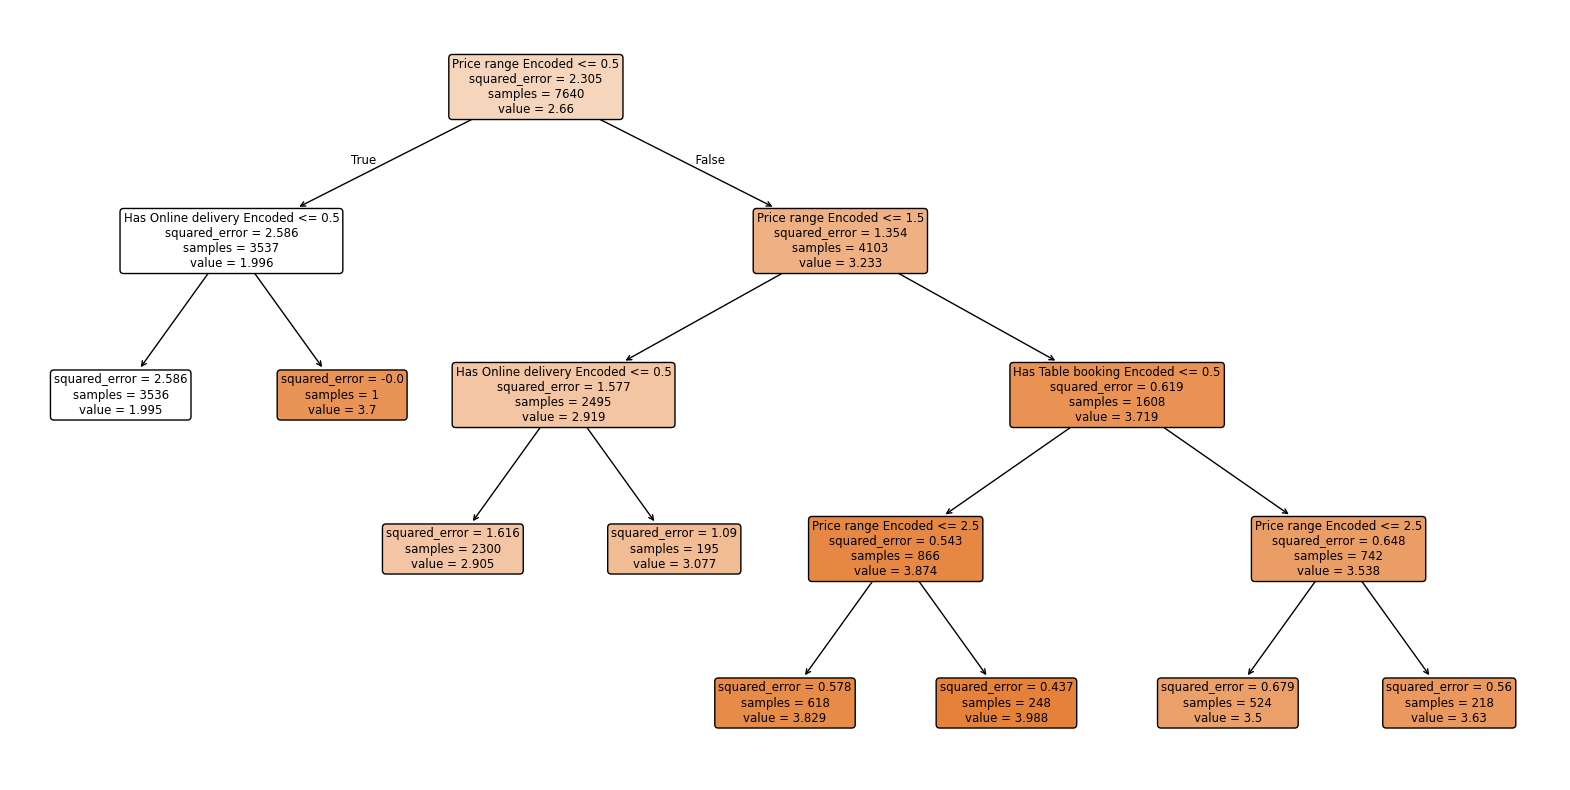

Linear Regression - MAE : 1.1216418504425338, MSE : 1.8313776136279274, R2 : 0.19539107247280185
Decision Tree - MAE : 1.0970053621305902, MSE : 1.7943855064743999, R2 : 0.21164341685130972
Random Forest - MAE : 1.0968460291695765, MSE : 1.7942863656602266, R2 : 0.21168697399843905


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt

# Function

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error( y_test, y_pred)
    mse = mean_squared_error( y_test, y_pred)
    r2 = r2_score( y_test, y_pred)
    return mae, mse, r2

#Linear Regression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_mae, lr_mse, lr_r2 = evaluate_model(lr, x_test, y_test)

#DecisionTree

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features.columns, filled=True, rounded=True)
plt.show()
dt_mae, dt_mse, dt_r2 = evaluate_model(dt, x_test, y_test)

#RandomForest

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
rf_mae, rf_mse, rf_r2 = evaluate_model(rf, x_test, y_test)

#Print

print(f"Linear Regression - MAE : {lr_mae}, MSE : {lr_mse}, R2 : {lr_r2}")
print(f"Decision Tree - MAE : {dt_mae}, MSE : {dt_mse}, R2 : {dt_r2}")
print(f"Random Forest - MAE : {rf_mae}, MSE : {rf_mse}, R2 : {rf_r2}")

# Conclusion

### 1. Decison Tree and RandomForest give better model performance
### 2. Linear regression gives Poor model performance